In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:

np.random.seed(42)

def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)
def error_vector(y, y_hat):
    return [-y[i]*np.log(y_hat[i]) - (1-y[i])*np.log(1-y_hat[i]) for i in range(len(y))]
def error(y, y_hat):
    ev = error_vector(y, y_hat)
    return sum(ev)/len(ev)

In [3]:


def dErrors(X, y, y_hat):
    DErrorsDx1 = [X[i][0]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDx2 = [X[i][1]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDb = [y[i]-y_hat[i] for i in range(len(y))]
    return DErrorsDx1, DErrorsDx2, DErrorsDb


In [4]:


def gradientDescentStep(X, y, W, b, learn_rate = 0.01):
    y_hat = prediction(X,W,b)
    errors = error_vector(y, y_hat)
    derivErrors = dErrors(X, y, y_hat)
    W[0] += sum(derivErrors[0])*learn_rate
    W[1] += sum(derivErrors[1])*learn_rate
    b += sum(derivErrors[2])*learn_rate
    return W, b, sum(errors)


In [5]:


def trainLR(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # Initialize the weights randomly
    W = np.array(np.random.rand(2,1))*2 -1
    b = np.random.rand(1)[0]*2 - 1
    
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the gradient descent step.
        W, b, error = gradientDescentStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        errors.append(error)
    return boundary_lines, errors


In [6]:
data = pd.read_csv('data/perceptron.csv', header=None)
X = data.iloc[:, [0, 1]].values
y = data.iloc[:, 2].values

In [7]:
boundaries, errors = trainLR(X, y)

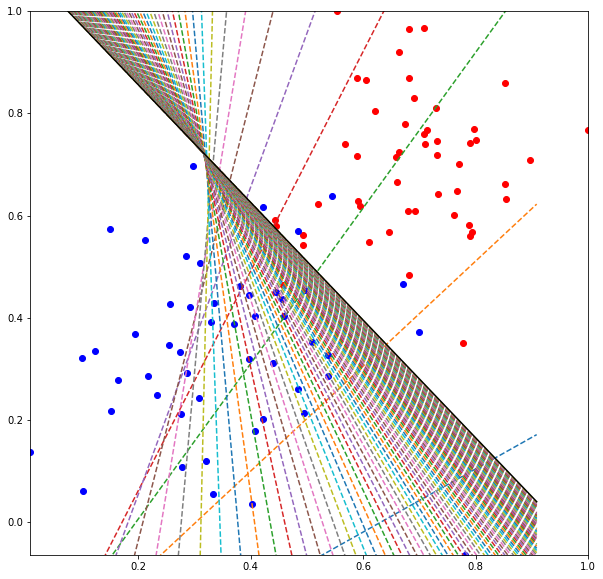

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0].values, data[data.iloc[:, 2] == 0].iloc[:, 1].values, c='red')
plt.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0].values, data[data.iloc[:, 2] == 1].iloc[:, 1].values, c='blue')


x_min, x_max = min(X.T[0]), max(X.T[0])
y_min, y_max = min(X.T[1]), max(X.T[1])

l = len(boundaries)

for idx, b in enumerate(boundaries):
    axes = plt.gca()
    x_vals = [i for i in np.arange(x_min, x_max, 0.1)]
    y_vals = b[1] + b[0] * x_vals
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([y_min,y_max])
    if idx == (l-1):
        plt.plot(x_vals, y_vals, c='black')
    else:
        plt.plot(x_vals, y_vals, '--')
plt.show()